# Load the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Process the data

In [3]:
sorted([str(i) for i in list(df.Cabin.unique())])

letter_code = [np.nan] * len(df)
seat_number = [np.nan] * len(df)

title_values = [np.nan] * len(df)
titles = {'Capt.': 1,
          'Col.': 2,
          'Don.': 3,
          'Dr.': 4, 
          'Major': 5,
          'Master': 6,
          'Miss.': 7,
          'Mlle.': 8,
          'Mme.': 9,
          'Mr.': 10,
          'Mrs.': 11,
          'Ms.': 12,
          'Rev.': 13}

ages = [np.nan] * len(df)

for index, row in df.iterrows():
    if str(row['Cabin']) != 'nan':
        temp = row['Cabin'].split(' ')[-1]
        
        letter_code[index] = temp[0]
        if len(temp[1::]) == 0:
            seat_number[index] = 0
        else:
            seat_number[index] = temp[1::]
            
    title = row['Name'].split(' ')[1]
    if title in titles:
        title_values[index] = title
    
    age = row['Age']
    if str(age) != 'nan':
        if age < 10: ages[index] = 1
        elif age < 25: ages[index] = 2
        elif age < 40: ages[index] = 3
        elif age < 60: ages[index] = 4
        else: ages[index] = 5

In [5]:
df['SeatLetter'] = pd.Series(letter_code)
df['SeatNumber'] = pd.Series(seat_number)
df['Title'] = pd.Series(title_values)
df[0:200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SeatLetter,SeatNumber,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,NaN,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E,46,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN,NaN,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,NaN,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,NaN,Mrs.


In [6]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

dic = {}
for ix, i in enumerate(sorted([str(i) for i in list(df['Cabin'].unique())])):
    dic.update({i: ix+1})
df['Cabin'] = df['Cabin'].map(dic)

dic = {}
for ix, i in enumerate(sorted([str(i) for i in list(df['SeatLetter'].unique())])):
    dic.update({i: ix})
df['SeatLetter'] = df['SeatLetter'].map(dic)

dic = {}
for ix, i in enumerate(sorted([str(i) for i in list(df['Title'].unique())])):
    dic.update({i: ix})
df['Title'] = df['Title'].map(dic)

dic = {'C': 1, 'Q': 2, 'S': 3}
df['Embarked'] = df['Embarked'].map(dic)

df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 
         'Embarked', 'Survived', 'SeatLetter', 'SeatNumber', 'Title']]

In [7]:
for i in df.columns:
    if df[i].isnull().values.any():
        print(i)
        if i == 'Embarked': df[i] = df[i].fillna(0)
        else: df[i] = df[i].fillna(0)

Age
Cabin
Embarked
SeatLetter
SeatNumber
Title


In [8]:
X = np.asarray(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
                   'Embarked', 'SeatLetter', 'SeatNumber', 'Title']])
Y = np.asarray(df['Survived'])
print(X.shape)
print(Y.shape)

(891, 11)
(891,)


In [9]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(596, 11)
(596,)
(295, 11)
(295,)


C:\Users\eee\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


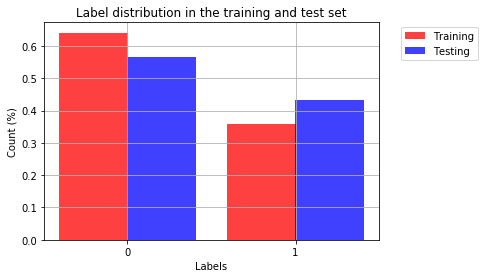

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

num_labels = 2

training_counts = [None] * num_labels 
testing_counts = [None] * num_labels
for i in range(2):
    training_counts[i] = len(y_train[y_train == i])/len(y_train)
    testing_counts[i] = len(y_test[y_test == i])/len(y_test)

# the histogram of the data
train_bar = plt.bar(np.arange(num_labels)-0.2, training_counts, align='center', color = 'r', alpha=0.75, width = 0.41, label='Training')
test_bar = plt.bar(np.arange(num_labels)+0.2, testing_counts, align='center', color = 'b', alpha=0.75, width = 0.41, label = 'Testing')

plt.xlabel('Labels')
plt.xticks(range(num_labels))
plt.ylabel('Count (%)')
plt.title('Label distribution in the training and test set')
plt.legend(bbox_to_anchor=(1.05, 1), handles=[train_bar, test_bar], loc=2)
plt.grid(True)
plt.show()

# Apply classifiers

In [11]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train[0:5000], y_train[0:5000])
clf.score(X_test, y_test)

0.6203389830508474

In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.6813559322033899

In [13]:
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_estimators = 100)

forest.fit(X_train, y_train)
print('Score: ', forest.score(X_test, y_test))
predictions = forest.predict(X_test)

Score:  0.7966101694915254
